# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-szRelXbv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p0_s2_2016-11-29_1712
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p0_s3_2016-11-29_1717
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p1_s1_2016-12-13_1612
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p1_s1_2016-12-13_1631
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p1_s2_2016-12-13_1622
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p1_s2_2016-12-13_1639
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p2_s1_2016-12-05_1534
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p2_s2_2016-12-05_1546
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p3_s1_2016-12-05_1733
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-szRelXbv\mcEcc_ct-szRelXbv_p3_s2_2016-12-05_1742
(960, 45)
Index([u'BsfL', u'Bs

Transforming the data set first.

In [3]:
# Stimulus sizes for the left- and right-eye stimuli:
ds['stimSzL'] = np.round((ds.periGap*ds.szRelL*2+32)/35,1)
ds['stimSzR'] = np.round((ds.periGap*ds.szRelR*2+32)/35,1)
# Separate columns for the static and dynamic stimulus sizes:
ds['stimSzStat'] = 0
ds.ix[ds.BvL==0.01,'stimSzStat'] = ds.ix[ds.BvL==0.01,'stimSzL']
ds.ix[ds.BvR==0.01,'stimSzStat'] = ds.ix[ds.BvR==0.01,'stimSzR']
ds['stimSzDyn'] = 0
ds.ix[ds.BvL==9.6,'stimSzDyn'] = ds.ix[ds.BvL==9.6,'stimSzL']
ds.ix[ds.BvR==9.6,'stimSzDyn'] = ds.ix[ds.BvR==9.6,'stimSzR']
# Size of the ring:
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
#ds['ringSzPL'] = np.round(ds.ringSzDeg/ds.stimSzL,2)
#ds['ringSzPR'] = np.round(ds.ringSzDeg/ds.stimSzL,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

   BsfL  BsfR   BvL   BvR     colorL     colorR  dirL  dirR  \
0  0.05  0.05  9.60  0.01  [0, 0, 0]  [0, 0, 0]     0     0   
1  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0   
2  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0   
3  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0   
4  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0   

             expName  fovFade    ...                 time  trialN  trialT  vL  \
0  mcEcc_ct-szRelXbv        2    ...      2016-11-29_1712       1     0.7   0   
1  mcEcc_ct-szRelXbv        2    ...      2016-11-29_1712       2     0.7   0   
2  mcEcc_ct-szRelXbv        2    ...      2016-11-29_1712       3     0.7   0   
3  mcEcc_ct-szRelXbv        2    ...      2016-11-29_1712       4     0.7   0   
4  mcEcc_ct-szRelXbv        2    ...      2016-11-29_1712       5     0.7   0   

   vR  stimSzL  stimSzR  stimSzStat  stimSzDyn  ringSzDeg  
0   0      6.4      6.4         6.4        6.4        5.3  
1   0      3.1

## Visualization

In [4]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0  133  0.692708  0.462578   192
1            1  229  0.596354  0.491268   384
2            2   63  0.328125  0.470758   192
3            3   91  0.473958  0.500627   192
Fast (left):
   participant  sum      mean       std  size
0            0    1  0.005208  0.072169   192
1            1   53  0.138021  0.345372   384
2            2   84  0.437500  0.497375   192
3            3   16  0.083333  0.277108   192
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   58  0.302083  0.460362   192
1            1   56  0.145833  0.353400   384
2            2    6  0.031250  0.174448   192
3            3   73  0.380208  0.486707   192


### Instances of slow/fast/patchy center/whole-field responses

#### As a function of the static stimulus size

(-0.1, 1.1)

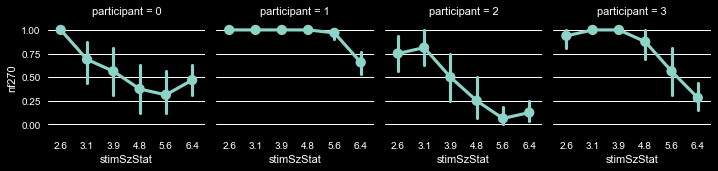

In [5]:
g = sns.factorplot(x='stimSzStat', y='nf270', col='participant', 
                   data=ds[(ds.stimSzDyn==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

Pretty steady decline of static-center responses with an increase in the static stimulus size, except for a slight uptick for when the static stimulus matches the large stimulus in size.

(-0.1, 1.1)

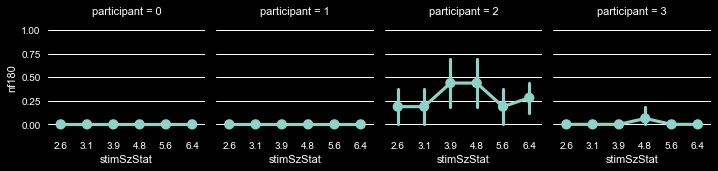

In [6]:
g = sns.factorplot(x='stimSzStat', y='nf180', col='participant',
                   data=ds[(ds.stimSzDyn==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

There are no instances when the whole field appeared fast.

(-0.1, 1.1)

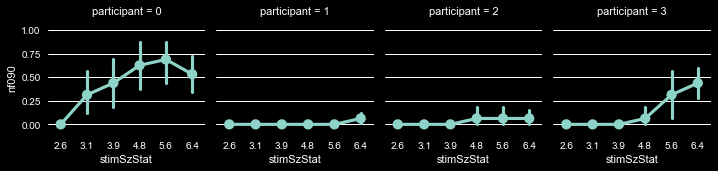

In [7]:
g = sns.factorplot(x='stimSzStat', y='nf090', col='participant', 
                   data=ds[(ds.stimSzDyn==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

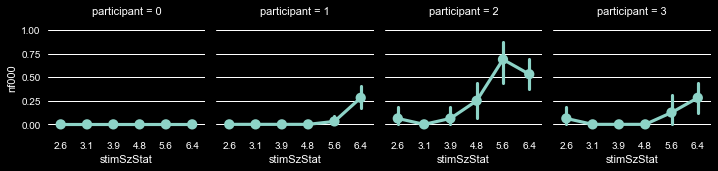

In [8]:
g = sns.factorplot(x='stimSzStat', y='nf000', col='participant', 
                   data=ds[(ds.stimSzDyn==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

In all instances when the slow-center was not observed, patchy rivalry occurred. This occurred for medium sizes of the static field.

In [17]:
summary = ds.groupby(['participant','stimSzStat'], as_index=False)['nf270','nf180','nf090','nf000'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['stimSzStat'] = summary.stimSzStat
sumPtnts['static'] = summary.nf270['mean']
sumPtnts['dynamic'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.nf090['mean']
sumPtnts['transparent'] = summary.nf000['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','stimSzStat'])
sumStimSz = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumStimSz.head(5)

,participant,stimSzStat,response,proportion trials
0,0,2.6,static,1.0000
1,0,3.1,static,0.6875
2,0,3.9,static,0.5625
3,0,4.8,static,0.3750
4,0,5.6,static,0.3125


(-0.1, 1.1)

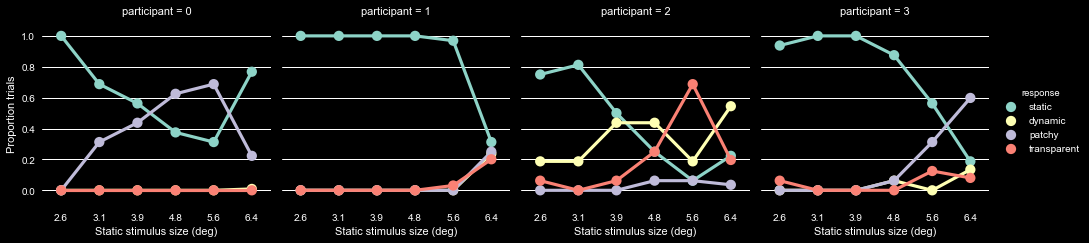

In [18]:
g = sns.factorplot(x='stimSzStat', y='proportion trials', hue='response', col='participant', data=sumStimSz, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('Static stimulus size (deg)','Proportion trials')
plt.ylim(-0.1,1.1)

#### As a function of the dynamic stimulus size

(-0.1, 1.1)

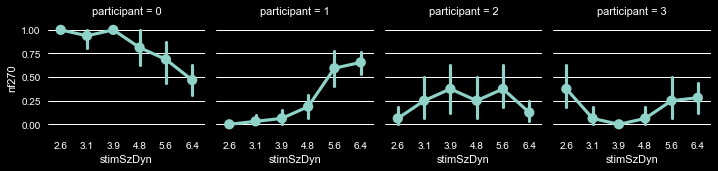

In [9]:
g = sns.factorplot(x='stimSzDyn', y='nf270', col='participant', 
                   data=ds[(ds.stimSzStat==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

Decline of static-center responses for large dynamic stimuli. The decline is only to half of the trials, however.

(-0.1, 1.1)

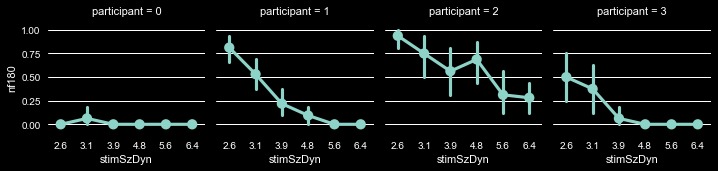

In [10]:
g = sns.factorplot(x='stimSzDyn', y='nf180', col='participant', 
                   data=ds[(ds.stimSzStat==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

A single when the whole field appeared fast.

(-0.1, 1.1)

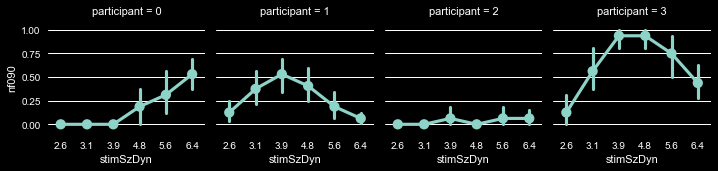

In [11]:
g = sns.factorplot(x='stimSzDyn', y='nf090', col='participant', 
                   data=ds[(ds.stimSzStat==6.4)], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

Instead, when the dynamic stimulus is large, patchy rivalry is more likely to occur. However, the probability only raises to about 50%.

In [19]:
summary = ds.groupby(['participant','stimSzDyn'], as_index=False)['nf270','nf180','nf090','nf000'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['stimSzDyn'] = summary.stimSzDyn
sumPtnts['static'] = summary.nf270['mean']
sumPtnts['dynamic'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.nf090['mean']
sumPtnts['transparent'] = summary.nf000['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','stimSzDyn'])
sumStimSz = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumStimSz.head(5)

,participant,stimSzDyn,response,proportion trials
0,0,2.6,static,1.0000
1,0,3.1,static,0.9375
2,0,3.9,static,1.0000
3,0,4.8,static,0.8125
4,0,5.6,static,0.6875


(-0.1, 1.1)

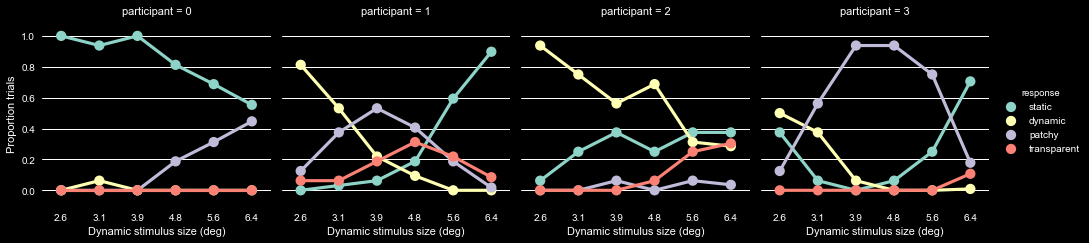

In [21]:
g = sns.factorplot(x='stimSzDyn', y='proportion trials', hue='response', col='participant', data=sumStimSz, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('Dynamic stimulus size (deg)','Proportion trials')
plt.ylim(-0.1,1.1)

### Size of the ring

#### As a function of the static stimulus size

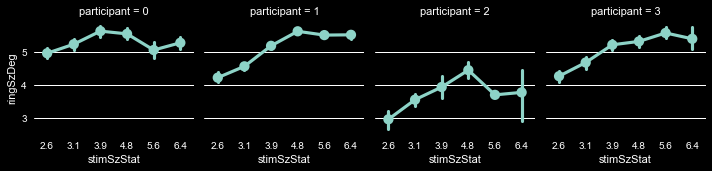

In [12]:
g = sns.factorplot(x='stimSzStat', y='ringSzDeg', col='participant',
                   data=ds[(ds.stimSzDyn==6.4) & (ds.nf270==1)], ci=95, dodge=.0, size=2.5)

For static stimulus of 4 degrees or less (about 50% of the radius), the ring includes the full static stimulus, along with some of the background. However, for larger static stimuli, only their centers are perceived as static.

Essentially, the ring includes the static stimulus if it is small to medium in size, but the moment it becomes large enough, only the center of it is perceived as slow, while the borders are fast.

There are no instances when the whole field appeared fast.

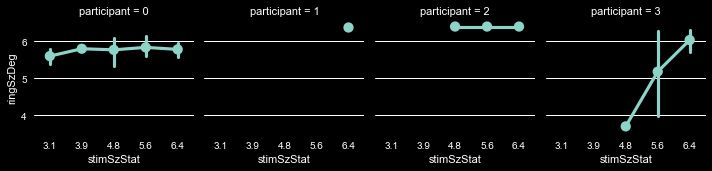

In [13]:
g = sns.factorplot(x='stimSzStat', y='ringSzDeg', col='participant', 
                   data=ds[(ds.stimSzDyn==6.4) & (ds.nf090==1)], ci=95, dodge=.0, size=2.5)

For patchy stimuli, the size of the ring was pretty much fixed for static stimuli of medium and large sizes.

#### As a function of the dynamic stimulus size

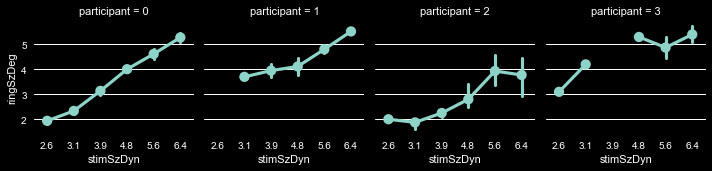

In [14]:
g = sns.factorplot(x='stimSzDyn', y='ringSzDeg', col='participant', 
                   data=ds[(ds.stimSzStat==6.4) & (ds.nf270==1)], ci=95, dodge=.0, size=2.5)

There's a very nice linear relationship here: the size of the ring pretty much perfectly scales with the size of the dynamic stimulus.

Only one instances of the fast field alone.

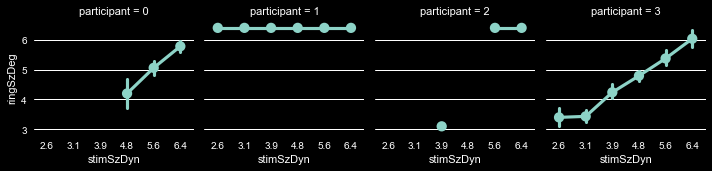

In [15]:
g = sns.factorplot(x='stimSzDyn', y='ringSzDeg', col='participant', 
                   data=ds[(ds.stimSzStat==6.4) & (ds.nf090==1)], ci=95, dodge=.0, size=2.5)

The same is true for the patchy trials.